In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from tqdm import tqdm
from sklearn.metrics import log_loss, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.chdir("D:/Training/Academy/ML(Python)/Datasets")

In [6]:
iris = pd.read_csv("iris.csv")
le = LabelEncoder()
iris['Species'] = le.fit_transform( iris['Species'] )
X, y = iris.drop('Species', axis=1), iris['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25,
                                                   stratify=y)

In [8]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred_prob = lda.predict_proba(X_test)
print("Log Loss =", log_loss(y_test, y_pred_prob))
y_pred = lda.predict(X_test)
print("Accuracy =",accuracy_score(y_test, y_pred))

Log Loss = 0.08513209888645436
Accuracy = 0.9555555555555556


In [9]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
y_pred_prob = qda.predict_proba(X_test)
print("Log Loss =", log_loss(y_test, y_pred_prob))
y_pred = qda.predict(X_test)
print("Accuracy =",accuracy_score(y_test, y_pred))

Log Loss = 0.04237087790419332
Accuracy = 0.9777777777777777


#### LDA as data transformer

In [19]:
import ipywidgets as widgets

In [ ]:
iris = pd.read_csv("iris.csv")
features = ['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']
def plot(col1, col2):
    sns.scatterplot(data=iris, x=col1, y=col2, hue='Species')
    plt.show()
widgets.interact(plot, col1=features, col2=features)

interactive(children=(Dropdown(description='col1', options=('Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Pe…

<function __main__.plot(col1, col2)>

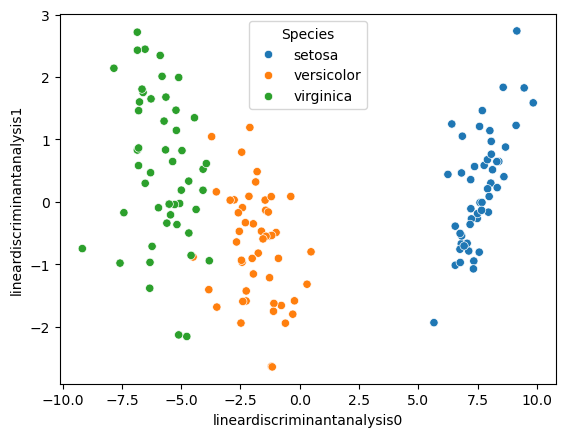

In [ ]:
lda = LinearDiscriminantAnalysis().set_output(transform='pandas')
X, y = iris.drop('Species', axis=1), iris['Species']
lda_components = lda.fit_transform(X, y)
lda_components['Species'] = y
sns.scatterplot(data=lda_components, x='lineardiscriminantanalysis0',
                y='lineardiscriminantanalysis1', hue='Species')
plt.show()

#### Vehicle Dataset

In [41]:
vehicle = pd.read_csv("D:/Training/Academy/ML(Python)/Cases/Vehicle Silhouettes/Vehicle.csv")
X, y = vehicle.drop('Class', axis=1), vehicle['Class']

In [47]:
features = list(X.columns)
def plot(col1, col2):
    sns.scatterplot(data=vehicle, x=col1, y=col2, hue='Class')
    plt.show()
widgets.interact(plot, col1=features, col2=features)

interactive(children=(Dropdown(description='col1', options=('Comp', 'Circ', 'D.Circ', 'Rad.Ra', 'Pr.Axis.Ra', …

<function __main__.plot(col1, col2)>

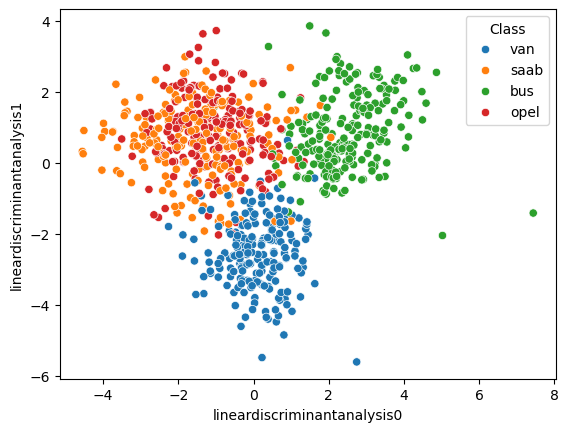

In [44]:
lda = LinearDiscriminantAnalysis().set_output(transform='pandas')
lda_components = lda.fit_transform(X, y)
lda_components['Class'] = y
sns.scatterplot(data=lda_components, x='lineardiscriminantanalysis0',
                y='lineardiscriminantanalysis1', hue='Class')
plt.show()

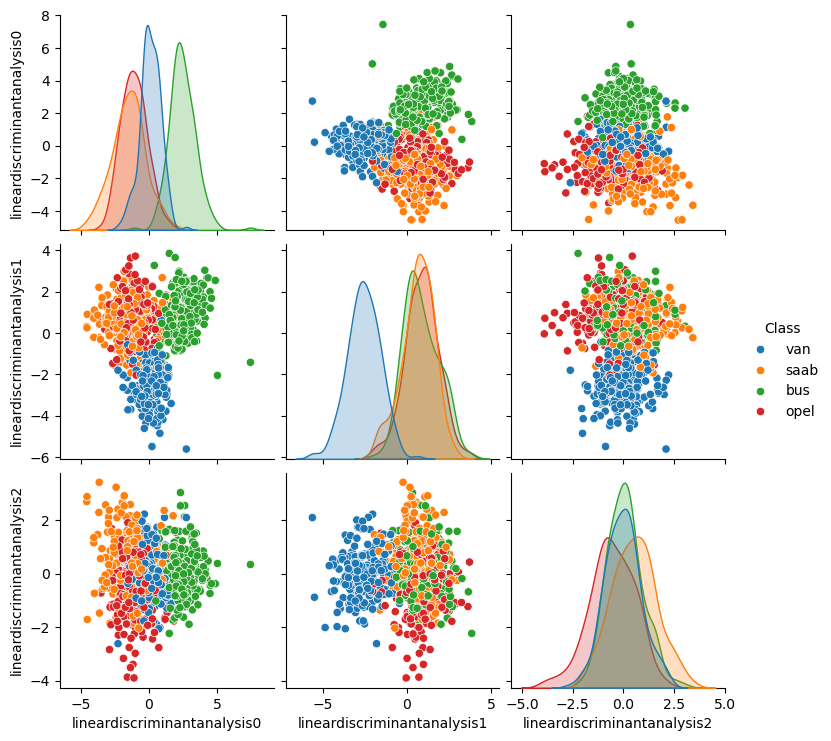

In [46]:
sns.pairplot(data=lda_components, hue="Class")
plt.show()

In [48]:
X.shape

(846, 18)